## FULL WORKING CODE — Normal Distribution Fitting Animation

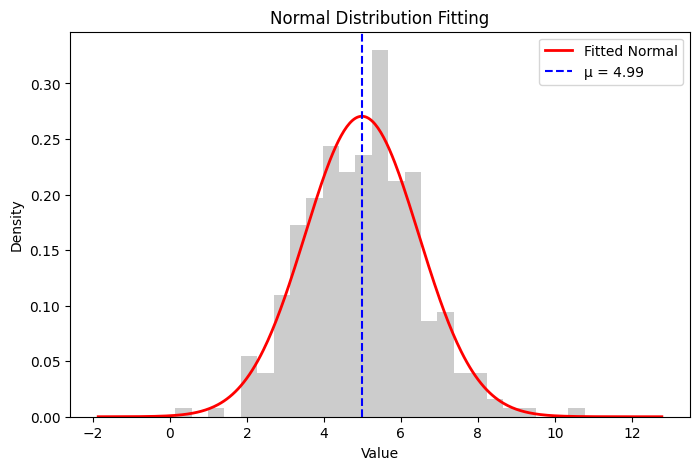

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from scipy.stats import norm

# -----------------------------------
# Create output directory
# -----------------------------------
os.makedirs("gifs", exist_ok=True)

# -----------------------------------
# Generate data
# -----------------------------------
np.random.seed(42)
data = np.random.normal(loc=5.0, scale=1.5, size=300)

# -----------------------------------
# Prepare animation
# -----------------------------------
fig, ax = plt.subplots(figsize=(8, 5))

x_vals = np.linspace(data.min() - 2, data.max() + 2, 400)

hist = None
pdf_line, = ax.plot([], [], "r", linewidth=2, label="Fitted Normal")
mean_line = ax.axvline(0, color="blue", linestyle="--", label="Mean")

ax.set_title("Normal Distribution Fitting")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.legend()

# -----------------------------------
# Animation
# -----------------------------------
writer = PillowWriter(fps=3)

with writer.saving(fig, "gifs/normal_distribution_fitting.gif", dpi=120):

    for i in range(5, len(data), 3):
        ax.cla()

        subset = data[:i]

        mu = np.mean(subset)
        sigma = np.std(subset)

        # Histogram
        ax.hist(subset, bins=25, density=True, alpha=0.4, color="gray")

        # Normal PDF
        pdf = norm.pdf(x_vals, mu, sigma)
        ax.plot(x_vals, pdf, "r", linewidth=2, label="Fitted Normal")

        # Mean line
        ax.axvline(mu, color="blue", linestyle="--", label=f"μ = {mu:.2f}")

        ax.set_title("Normal Distribution Fitting")
        ax.set_xlabel("Value")
        ax.set_ylabel("Density")
        ax.legend()

        writer.grab_frame()

plt.show()
